## (Machine Learning )TASK 3 - Clustering                         

##  Dure Sabih (Student ID 0070990)

In [145]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# for evaluation
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [215]:
import os  # to set the mx num of threads
os.environ["OMP_NUM_THREADS"] = '1'   

In [114]:
# Importing the dataset
ds = pd.read_csv('seeds_dataset.csv')

## Exploratory Data Analysis - Understanding the dataset

In [115]:
ds.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [116]:
ds.tail()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
205,206,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,207,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,208,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,209,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,210,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [117]:
ds.shape   # This dataset has 210 rows and 9 columns 

(210, 9)

In [118]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    210 non-null    int64  
 1   area                  210 non-null    float64
 2   perimeter             210 non-null    float64
 3   compactness           210 non-null    float64
 4   lengthOfKernel        210 non-null    float64
 5   widthOfKernel         210 non-null    float64
 6   asymmetryCoefficient  210 non-null    float64
 7   lengthOfKernelGroove  210 non-null    float64
 8   seedType              210 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.9 KB


Checking null values

In [119]:
ds.isnull().sum()

ID                      0
area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

Checking mean mediam min max via Describe

In [120]:
ds.describe()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,105.500000,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,60.765944,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,1.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,53.250000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,105.500000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,157.750000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,210.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## Checking duplicate rows

In [121]:
duplicate_rows = ds[ds.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 9)


In [122]:
#Different types of seeds counts?
ds.seedType.value_counts()

1    70
2    70
3    70
Name: seedType, dtype: int64

C:\Users\DCPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


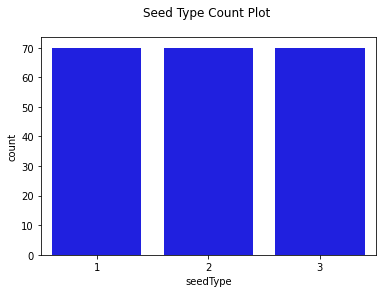

In [123]:
plt.title('Seed Type Count Plot \n', size=12)
sns.countplot(ds['seedType'], palette=["blue"])
plt.show()
#We can see below that all our outputs have 0 class imbalance

In [124]:
sns.pairplot(ds.iloc[:,[1,2,3,4,5,6,7,8]]
#perimeter and asymetry coefficient look like 3 groups

SyntaxError: unexpected EOF while parsing (1424835850.py, line 2)

Text(0.5, 0.98, 'Pair Plot Scatter plots for types of seeds ')

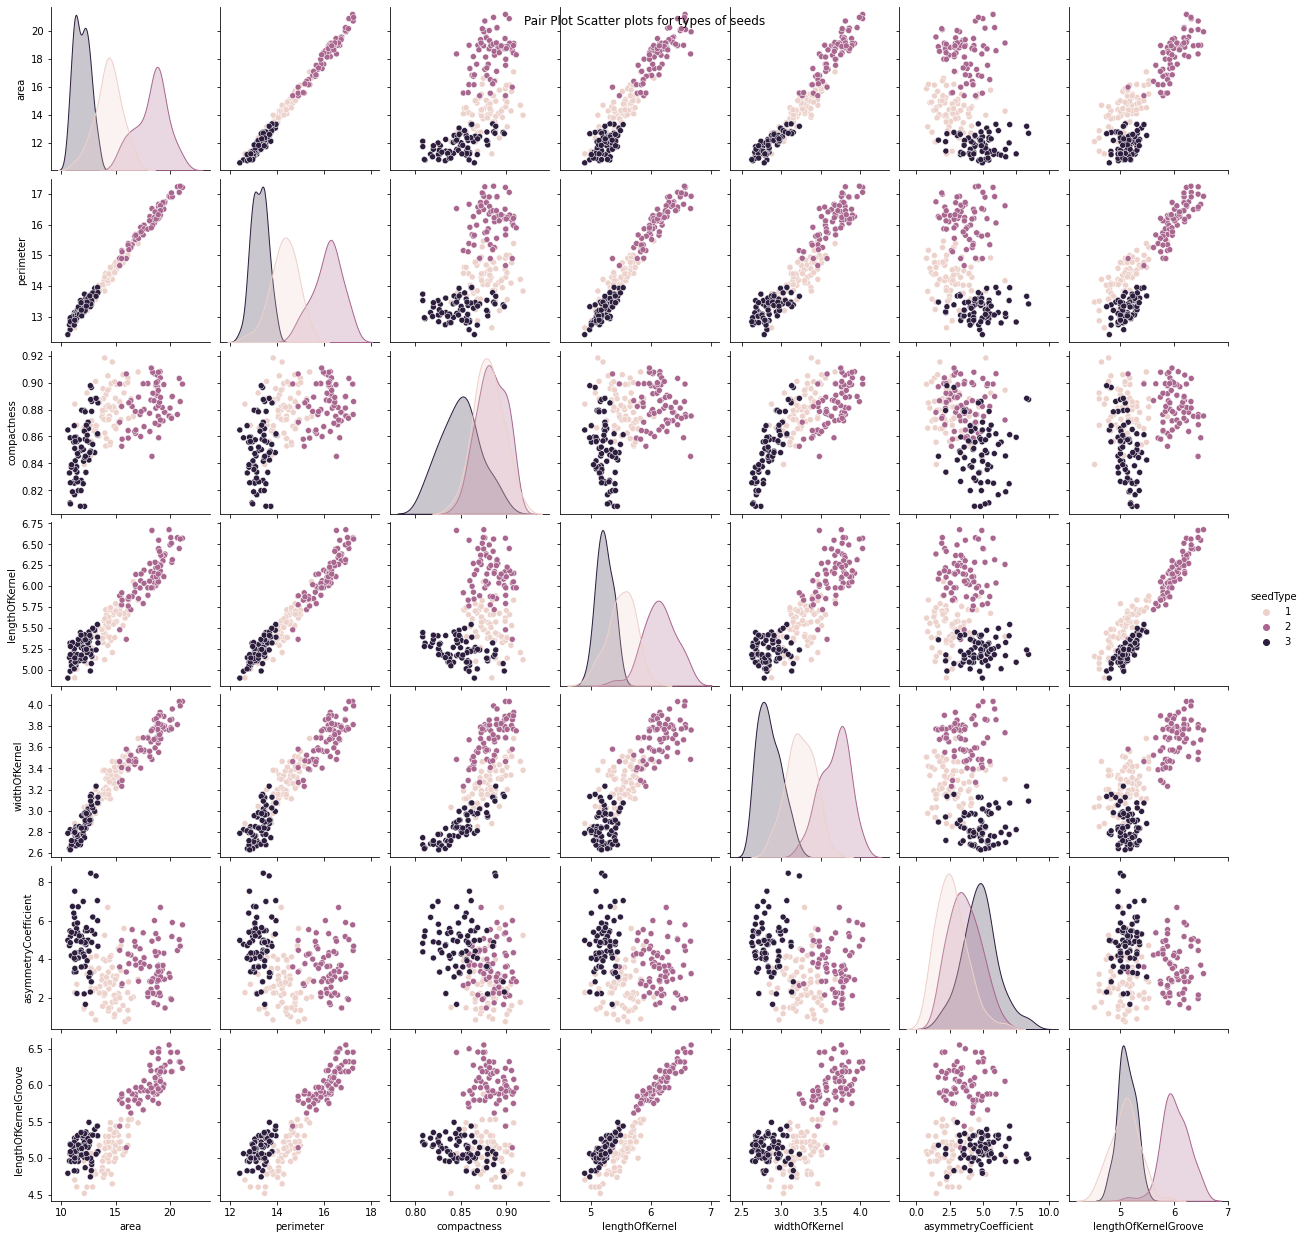

In [125]:
sns.pairplot(ds.iloc[:,[1,2,3,4,5,6,7,8]], hue='seedType').fig.suptitle('Pair Plot Scatter plots for types of seeds ')

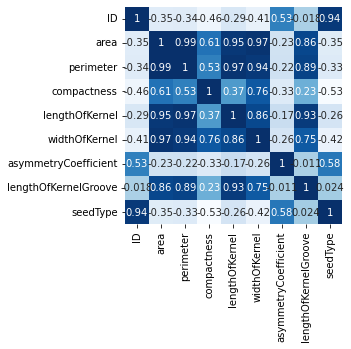

In [126]:
## HEAT MAP CORR
sns.heatmap(ds.corr(), square=True, annot=True, cbar=False, cmap='Blues');

In [127]:

# Defining a neumerical variable to find the outliers via boxplots

num_var = ds.iloc[:,[1,2,3,4,5,6,7]].copy()

C:\Users\DCPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DCPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DCPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DCPC\anaconda3\lib\site-p

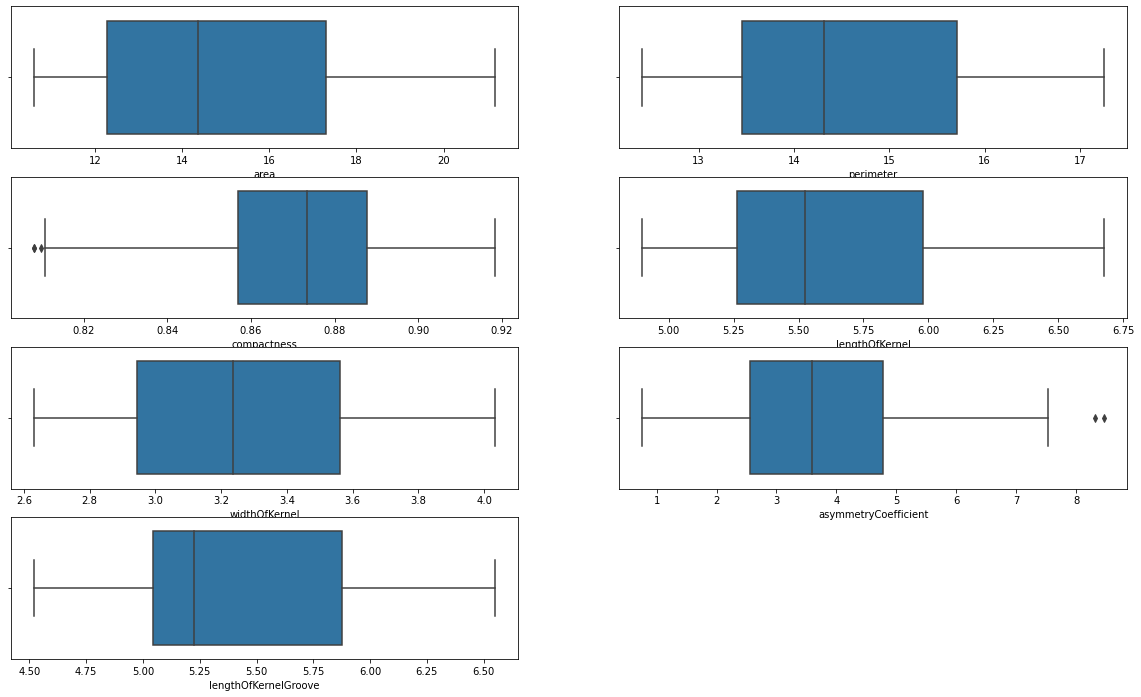

In [42]:
plt.figure(figsize=(20,12))
plt.title("Box Plot to spot outliers")
for i in range(len(num_var.columns)):
    plt.subplot(4,2 , i+1)
    sns.boxplot(num_var[num_var.columns[i]])

https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/#:~:text=The%20answer%20to%20this%20question,be%20done%20before%20outlier%20detection.

## DATA PREPROCESSING

In [43]:
#Defining a new dataframe by dropping the first ID column
ds.drop('ID', axis=1, inplace = True)
ds.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


We can see that the types of seeds values are 1, 2 , 3 however the index or label values in Scikit Learn start from 0 hence we will replace these values

## Splitting independent and dependent variables:

In [184]:
X = ds.iloc[:, [0,1,2,3,4,5,6,7]].values

y=ds['seedType']-1  

In [185]:
y

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: seedType, Length: 210, dtype: int64

## Scaling 

In [186]:
# Fitting SD Scalar on the values
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# IMPLEMENTATION 

# K MEANS ALGORITHM

C:\Users\DCPC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DCPC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DCPC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DCPC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

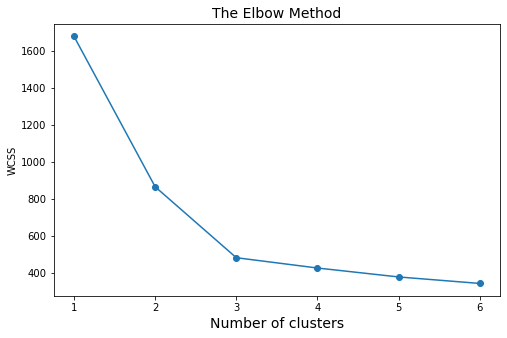

In [187]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5)) 
plt.plot(range(1, 7), wcss, marker = 'o')
plt.title('The Elbow Method', size=14)
plt.xlabel('Number of clusters', size=14)
plt.ylabel('WCSS')
plt.show()

## Using the Fit-predict method 

Optimal number of clusters has been identified so the 
fit_predict() method is used to train a KMeans() estimator on the 
dataset and return an array y_kmeans which is the same length
as our Data Frame and tells us which 
cluster each row has been assigned.

In [188]:
kmeans = KMeans(n_clusters =3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\DCPC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [190]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [194]:
y_pred = y_kmeans.copy()
predicted_kmeans = ds.copy(deep=True)
predicted_kmeans['label'] = y_kmeans

In [195]:
predicted_kmeans.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,label
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1


In [196]:
predicted_kmeans

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,label
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1
...,...,...,...,...,...,...,...,...,...,...
205,206,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,2
206,207,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,2
207,208,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,2
208,209,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,2


In [199]:
print('Original Data Classes:')
print(ds.seedType.value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(predicted_kmeans.label.value_counts())
print('-' * 30)

Original Data Classes:
1    70
2    70
3    70
Name: seedType, dtype: int64
------------------------------
K-Means Predicted Data Classes:
2    71
0    70
1    69
Name: label, dtype: int64
------------------------------


In [200]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute confusion matrix 
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(y, y_kmeans)
print ('Purity for K-means before PCA = ', purity)

Purity for K-means before PCA =  0.9761904761904762


## Using PCA to refine the clusters

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)   # change the n components to see the variance
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.64874299, 0.20116429, 0.08558148, 0.05584532])

In [153]:
sum(pca.explained_variance_ratio_)

0.99133406817594

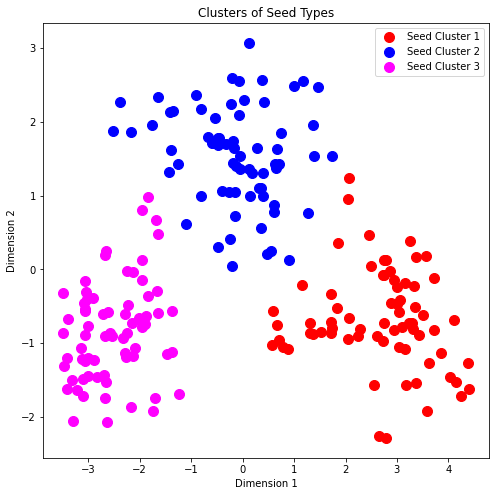

In [154]:
# Visualising the clusters
colours = ['red', 'blue', 'magenta']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1],
               s = 100, c = colours[i] , label = 'Seed Cluster '+str(i+1))
plt.title('Clusters of Seed Types')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [155]:
y

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: seedType, Length: 210, dtype: int64

In [156]:
purity = purity_score(y, y_kmeans)
print ('Purity score for ', purity)

Purity score for  0.9761904761904762


In [157]:
silhouette_avg = metrics.silhouette_score(X_reduced, y_kmeans)
print ('silhouette coefficient after PCA = ', silhouette_avg)

silhouette coefficient after PCA =  0.4689072348723376


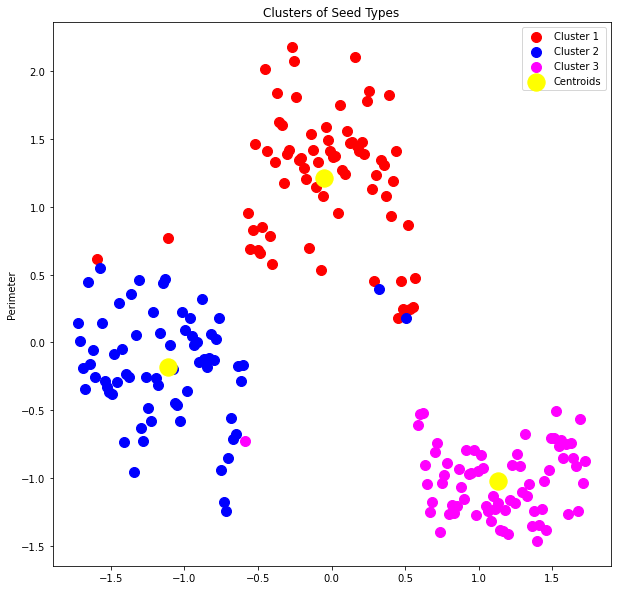

In [159]:
# Visualising the clusters
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Seed Types')
plt.xlabel('')
plt.ylabel('Perimeter')
plt.legend()
plt.show()


# Hierarchical Clustering



## Using DENDOGRAM

In [160]:
# Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch

<function matplotlib.pyplot.show(close=None, block=None)>

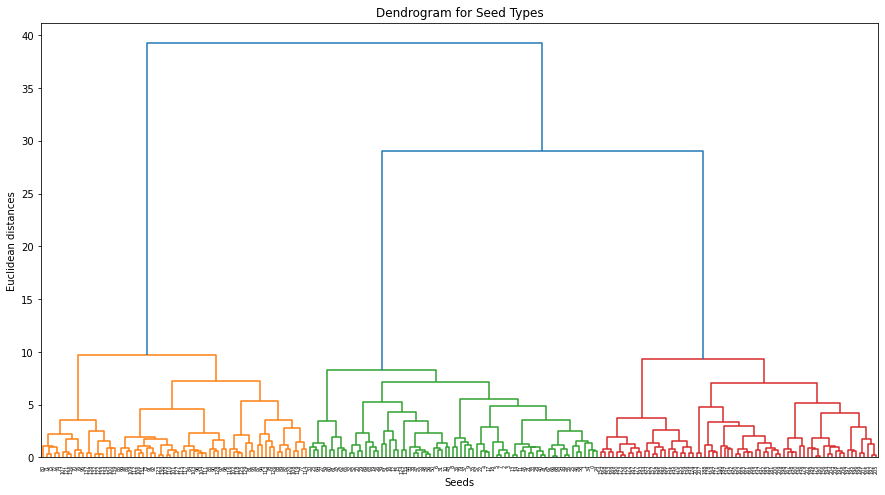

In [218]:
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method = 'ward'))
plt.title('Dendrogram for Seed Types')
plt.xlabel('Seeds')
plt.ylabel('Euclidean distances')
plt.show

## Fitting Hierarchial Clustering  dataset

In [219]:
# Fitting Hierarchial Clustering  dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_reduced)


## Visualising the clusters

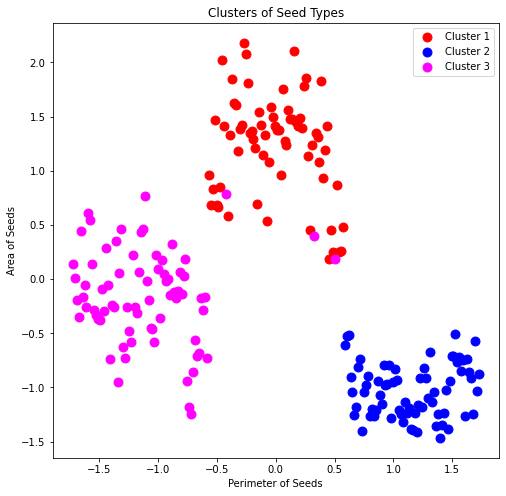

In [222]:

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s = 80, c = 'magenta', label = 'Cluster 3')

plt.title('Clusters of Seed Types')
plt.xlabel('Perimeter of Seeds')
plt.ylabel('Area of Seeds')
plt.legend()
plt.show()

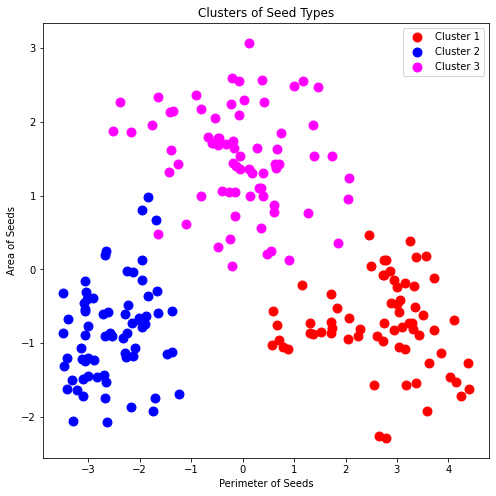

In [221]:

plt.figure(figsize=(8,8))
plt.scatter(X_reduced[y_hc == 0,0], X_reduced[y_hc == 0,1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(X_reduced[y_hc == 1,0], X_reduced[y_hc == 1,1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(X_reduced[y_hc == 2,0], X_reduced[y_hc == 2,1], s = 80, c = 'magenta', label = 'Cluster 3')

plt.title('Clusters of Seed Types')
plt.xlabel('Perimeter of Seeds')
plt.ylabel('Area of Seeds')
plt.legend()
plt.show()

# Model Evaluation

## Silhouette Score for Comparison

In [203]:
silhouette = metrics.silhouette_score(X, y_kmeans)
print ('silhouette coefficient before PCA = ', silhouette)

silhouette coefficient before PCA =  0.46152008311626175


In [204]:
silhouette = metrics.silhouette_score(X_reduced, y_kmeans)
print ('silhouette coefficient after PCA = ', silhouette)

silhouette coefficient after PCA =  0.4689072348723376


In [205]:
silhouette = metrics.silhouette_score(X, y_hc)
print ('silhouette coefficient for HC  = ', silhouette)

silhouette coefficient for HC  =  0.46111971103000027


In [223]:
silhouette = metrics.silhouette_score(X_reduced, y_hc)
print ('silhouette coefficient for HC pca= ', silhouette)

silhouette coefficient for HC pca=  0.4648546282842716


## Davies Bouldin Index

In [211]:
print('DBI for Kmeans without PCA',davies_bouldin_score(X, y_kmeans))

DBI for Kmeans without PCA 0.8069418402395496


In [212]:
print('DBI for Kmeans with PCA',davies_bouldin_score(X_reduced, y_kmeans ))

DBI for Kmeans with PCA 0.7905129907880379


In [213]:
print('DBI for HC',davies_bouldin_score(X, y_hc))

DBI for HC 0.8083627230515188


In [224]:
print('DBI for HC',davies_bouldin_score(X_reduced, y_hc))

DBI for HC 0.7957657658156466


## PURITY Score 

In [209]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute confusion matrix 
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(y, y_kmeans)
print ('Purity for K-means before PCA = ', purity)

Purity for K-means before PCA =  0.9761904761904762


In [225]:
purity = purity_score(y, y_hc)
print ('Purity for Hierarchical clustering = ', purity)

Purity for Hierarchical clustering =  0.9857142857142858
